
# Linear Regression Project: Predicting whether costumers spent more money on the Company's APP or website


## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Get the Data


In [2]:
df = pd.read_csv('Ecommerce Customers')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


**Check the head of the data, info() and describe()**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis

___
**compare the Time on Website and Yearly Amount Spent columns.**

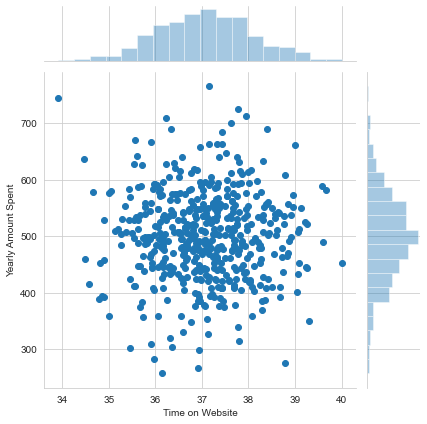

In [5]:
sns.set_style('whitegrid')
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=df)

   **Same but with the Time on App column instead**

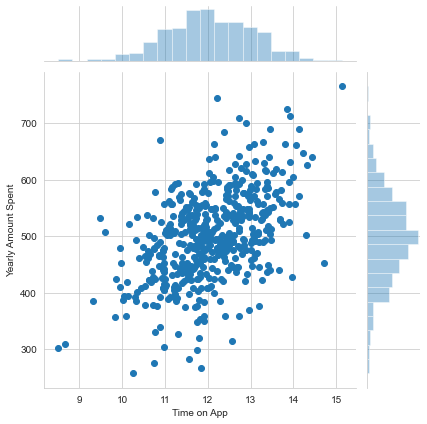

In [6]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=df)

**comparing Time on App and Length of Membership.**

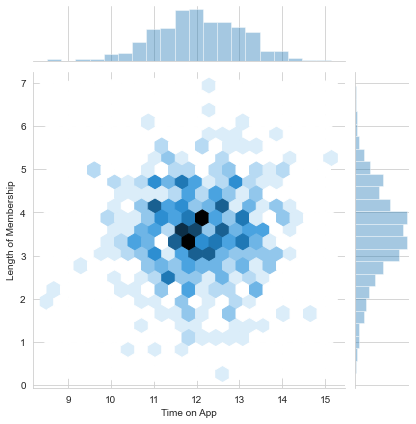

In [7]:
sns.jointplot(x='Time on App', y='Length of Membership', kind='hex', data=df)

**relationships across the entire data set.**

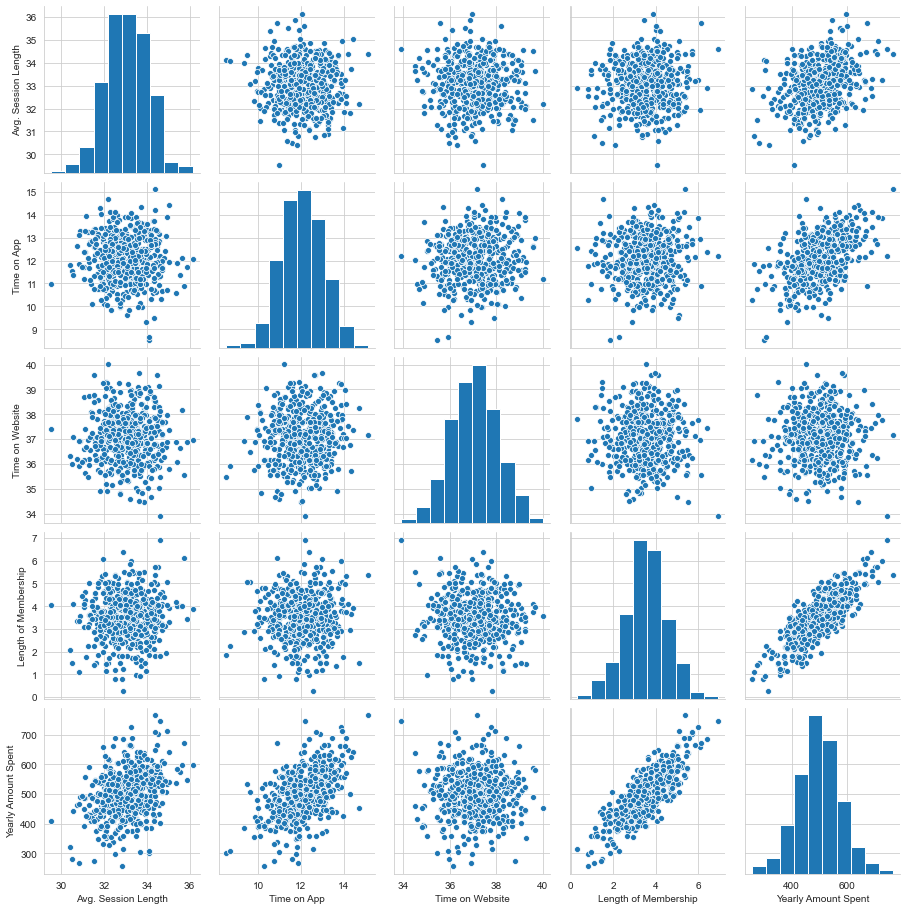

In [8]:
sns.pairplot(df)

**the most correlated feature with Yearly Amount Spent is Length of Membership**

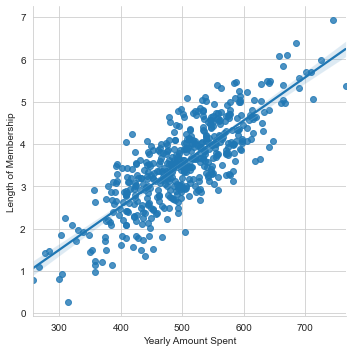

In [9]:
sns.lmplot(x='Yearly Amount Spent', y='Length of Membership', data=df)

## Training and Testing Data


In [10]:
df.columns
y= df['Yearly Amount Spent']
x= df[['Length of Membership','Time on App', 'Time on Website', 'Avg. Session Length']]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 101)

## Training the Model


In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lm = LinearRegression()

In [15]:
lm.fit(x_train,y_train)

LinearRegression()

**Print out the coefficients of the model**

In [16]:
print('Coefficients:', lm.coef_)

Coefficients: [61.27909654 38.59015875  0.19040528 25.98154972]


## Predicting Test Data

In [17]:
predictions = lm.predict(x_test)

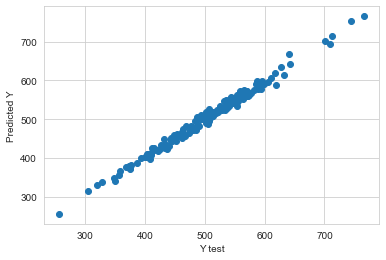

In [18]:
plt.scatter(y_test, predictions)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')
plt.show()

## Evaluating the Model


In [19]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148653430824
MSE: 79.81305165097422
RMSE: 8.933815066978621


## Residuals


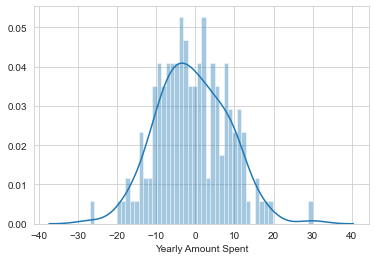

In [20]:
sns.distplot(y_test-predictions, bins=50)

## Conclusion


In [21]:
Coefficient = pd.DataFrame(lm.coef_, x.columns)
Coefficient.columns = ['Coefficient']
Coefficient


,Coefficient
Length of Membership,61.279097
Time on App,38.590159
Time on Website,0.190405
Avg. Session Length,25.981550


**Interpreting the coefficients**

From the coefficients, you can see that time spent on the App yeilds more money than time spent on the website. The company should develop the website more or they can just choose to develop the App more since that works better.